In [42]:
PATH = "/home/chris/Documents/UNI_neu/Masterarbeit/other_data/100k_coursera_dataset/"
import pandas as pd
from os.path import join
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm, tqdm_notebook
import numpy as np

from derive_conceptualspace.util.jsonloadstore import json_dump
from derive_conceptualspace.util.mpl_tools import show_hist

In [90]:
df = pd.read_csv(join(PATH, "reviews_by_course.csv"))
print(len(df))
print(len(df["CourseId"].unique()))
df.head()

140320
1835


,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


Saving figure `Lens_per_Review_2022-01-05_11-48-51` under `/home/chris/saved_plots/2022-01-05/Lens_per_Review_2022-01-05_11-48-51.png`


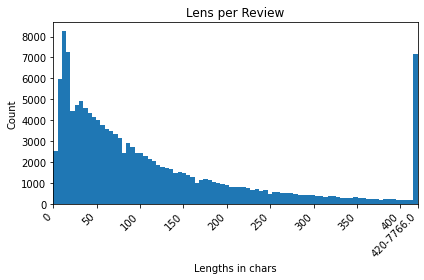

In [80]:
#df["Review"].str.len().hist(bins=1000, log=True)
lens = [i if not np.isnan(i) else 0 for i in df["Review"].str.len()]
show_hist(lens, "Lens per Review", xlabel="Lengths in chars", ylabel="Count", cutoff_percentile=95, log=False)

## Filtering (only english, long enough, ..)

In [52]:
lans = []
for item in tqdm_notebook(df["Review"]):
    if not isinstance(item, str) or len(item) < 40:
        lans.append("tooshort")
    else:
        try:
            lans.append(detect(item))
        except LangDetectException as e:
            lans.append("unk")
df["lan"] = lans

<ipython-input-52-47e8f6ab96f8>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for item in tqdm_notebook(df["Review"]):


  0%|          | 0/140320 [00:00<?, ?it/s]

In [71]:
ens = df[df["lan"] == "en"]
grouped_reviews = ens.groupby("CourseId")['Review'].apply(lambda x: '. \n'.join(x))

Saving figure `Lens_per_All-Reviews-Per-Course_2022-01-05_11-49-12` under `/home/chris/saved_plots/2022-01-05/Lens_per_All-Reviews-Per-Course_2022-01-05_11-49-12.png`


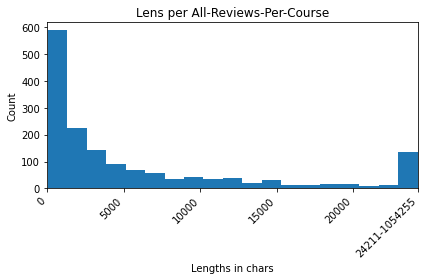

In [83]:
show_hist(grouped_reviews.str.len(), "Lens per All-Reviews-Per-Course", xlabel="Lengths in chars", ylabel="Count", cutoff_percentile=92, log=False)

Saving figure `Lens_per_All-Reviews-Per-Course_2022-01-05_11-50-08` under `/home/chris/saved_plots/2022-01-05/Lens_per_All-Reviews-Per-Course_2022-01-05_11-50-08.png`


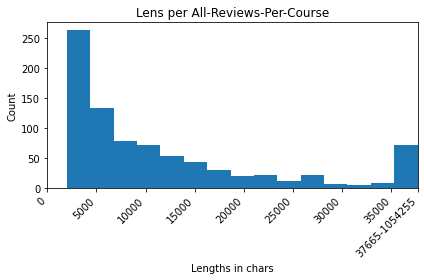

In [85]:
show_hist([i for i in grouped_reviews.str.len() if i > 2000], "Lens per All-Reviews-Per-Course", xlabel="Lengths in chars", ylabel="Count", cutoff_percentile=92, log=False)

In [91]:
tmp = grouped_reviews[grouped_reviews.str.len() > 2000]
print(tmp)
#for k,v in dict(tmp[:10]).items():
#    print("\n\n"+k)
#    print("  "+("\n  ".join(v.split("\n"))))

CourseId
2-speed-it                  Great course - I recommend it for all, especia...
3d-printing-applications    Excellent overview of the ways in which 3D pri...
3d-printing-revolution      This is a very basic course on 3D Printing Tec...
3d-printing-software        Thank you so much Jeff, iy was usefull course,...
abdomen-anatomy             Excellent course you should make more courses ...
                                                  ...                        
world-change                It's great to know that halfway across the wor...
writing-for-business        Simple techniques that can create habits for g...
writing-for-children        I love this course! It is very inspiring and f...
written-constitution        i'm the whole constitution lil' July 4, 1776. ...
youth-sports                Great course! Very well structured and taught....
Name: Review, Length: 847, dtype: object


In [96]:
json_dump(dict(tmp), "/home/chris/Documents/UNI_neu/Masterarbeit/other_data/100k_coursera_dataset/usable_reviews.json")

'/home/chris/Documents/UNI_neu/Masterarbeit/other_data/100k_coursera_dataset/usable_reviews_2.json'

In [97]:
tmp.to_csv("/home/chris/Documents/UNI_neu/Masterarbeit/other_data/100k_coursera_dataset/usable_reviews.csv")

In [100]:
json_dump(dict(langs={i: "en" for i in tmp.index}), "/home/chris/Documents/UNI_neu/Masterarbeit/other_data/100k_coursera_dataset/languages.json")

'/home/chris/Documents/UNI_neu/Masterarbeit/other_data/100k_coursera_dataset/languages_2.json'